<a href="https://colab.research.google.com/github/ara42/Machine-Learning/blob/main/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_breast_cancer

In [7]:
cancer = load_breast_cancer()
data = cancer.data
label = cancer.target

In [5]:
from sklearn.preprocessing import StandardScaler

In [8]:
ss = StandardScaler()
scaled_data = ss.fit_transform(data)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(scaled_data,label)

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
model = LogisticRegression()
model.fit(x_train,y_train)
pred = model.predict(x_test)

In [13]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score

In [14]:
print("acc : ",accuracy_score(y_test,pred))
print("roc : ",roc_auc_score(y_test,pred))
print("rec : ",recall_score(y_test,pred))

acc :  0.9790209790209791
roc :  0.9741379310344828
rec :  1.0


In [16]:
solovers = ['lbfgs',
            'liblinear',
            'newton-cg',
            'newton-cholesky',
            'sag',
            'saga']
for solver in solovers:
    model = LogisticRegression(solver=solver, max_iter=600)
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    print("====",solver,"====")
    print("acc:",accuracy_score(y_test,pred))
    print("roc:",roc_auc_score(y_test,pred))
    print("rec:",recall_score(y_test,pred))

==== lbfgs ====
acc: 0.9790209790209791
roc: 0.9741379310344828
rec: 1.0
==== liblinear ====
acc: 0.9790209790209791
roc: 0.9741379310344828
rec: 1.0
==== newton-cg ====
acc: 0.9790209790209791
roc: 0.9741379310344828
rec: 1.0
==== newton-cholesky ====
acc: 0.9790209790209791
roc: 0.9741379310344828
rec: 1.0
==== sag ====
acc: 0.9790209790209791
roc: 0.9741379310344828
rec: 1.0
==== saga ====
acc: 0.9790209790209791
roc: 0.9741379310344828
rec: 1.0


In [18]:
from sklearn.model_selection import GridSearchCV

In [17]:
params = {
    'solver':['liblinear','lbfgs'],
    'penalty':['l2','l1'],
    'C':[0.01,0.1,1,5,10]
}

In [19]:
lr = LogisticRegression()
gs = GridSearchCV(lr,param_grid=params,scoring='accuracy',cv=3)
gs.fit(x_train,y_train)
print(gs.best_params_)
print(gs.best_score_)

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.971830985915493


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

In [20]:
pred = gs.predict(x_test)
print("acc:",accuracy_score(y_test,pred))
print("roc:",roc_auc_score(y_test,pred))
print("rec:",recall_score(y_test,pred))

acc: 0.972027972027972
roc: 0.9655172413793103
rec: 1.0


In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [25]:
cross_val_score,
model = RandomForestRegressor(n_estimators=1000)
nmse = cross_val_score(model, x_train, y_train,
                       scoring='neg_mean_squared_error',
                       cv=5)

In [27]:
print("neg mse : ",nmse)
print("mse : ",-1*nmse)
print("rmse : ",np.sqrt(-1*nmse))
print("rmse 평균 : ",np.sqrt(-1*nmse).mean())

neg mse :  [-0.03716217 -0.02480682 -0.08305146 -0.01797572 -0.04183874]
mse :  [0.03716217 0.02480682 0.08305146 0.01797572 0.04183874]
rmse :  [0.19277493 0.15750182 0.2881865  0.13407355 0.20454521]
rmse 평균 :  0.19541640232899776


## boston_house 데이터 이용

In [36]:
path = '/content/drive/MyDrive/Colab Notebooks/Machine-Learning/boston_house.csv'
df = pd.read_csv(path)
data = df.drop('Target',axis=1)
label = df['Target']
ss = StandardScaler()
scaled_data = ss.fit_transform(data)
x_train,x_test,y_train,y_test = train_test_split(scaled_data,label)

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [37]:
m1 = DecisionTreeRegressor(max_depth=4)
m2 = RandomForestRegressor(n_estimators=1000)
m3 = GradientBoostingRegressor(n_estimators=1000)
m4 = XGBRegressor(n_estimators=1000)
m5 = LGBMRegressor(n_estimators=1000)

In [38]:
models = [m1, m2, m3, m4, m5]
for model in models:
    print(model.__class__.__name__,"$$$$$$$$$$$$$$$$$$$$$$")
    nmse = cross_val_score(model, x_train, y_train,
                       scoring='neg_mean_squared_error',
                       cv=5)
    print("rmse 평균 : ",np.sqrt(-1*nmse).mean())

DecisionTreeRegressor $$$$$$$$$$$$$$$$$$$$$$
rmse 평균 :  4.637714976486723
RandomForestRegressor $$$$$$$$$$$$$$$$$$$$$$
rmse 평균 :  3.531179062129257
GradientBoostingRegressor $$$$$$$$$$$$$$$$$$$$$$
rmse 평균 :  3.210782022736885
XGBRegressor $$$$$$$$$$$$$$$$$$$$$$
rmse 평균 :  3.540139519567017
LGBMRegressor $$$$$$$$$$$$$$$$$$$$$$
rmse 평균 :  3.5423521680510204


In [39]:
model = DecisionTreeRegressor(max_depth=4)
model.fit(x_train,y_train)
model.feature_importances_

array([0.        , 0.        , 0.68417822, 0.04297635, 0.04023813,
       0.        , 0.17552551, 0.02791148, 0.02567937, 0.        ,
       0.        , 0.00349094, 0.        ])

In [40]:
sd = pd.Series(model.feature_importances_,index=data.columns)
sd = sd.sort_values(ascending=False)
sd

RM         0.684178
LSTAT      0.175526
CRIM       0.042976
DIS        0.040238
NOX        0.027911
PTRATIO    0.025679
TAX        0.003491
AGE        0.000000
B          0.000000
INDUS      0.000000
RAD        0.000000
ZN         0.000000
CHAS       0.000000
dtype: float64

In [41]:
import seaborn as sns

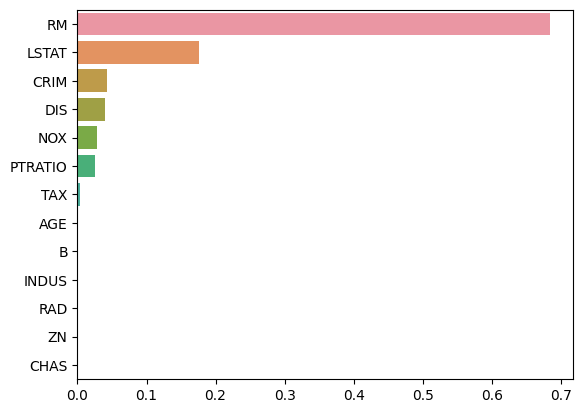

In [44]:
sns.barplot(x=sd,y=sd.index)
plt.show()

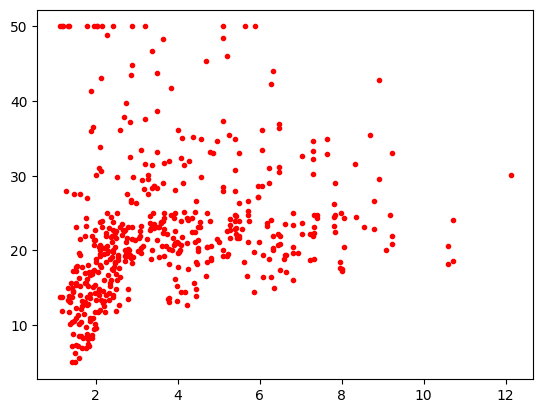

In [45]:
plt.plot(data.DIS,label,'r.')
plt.show()

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

In [49]:
x_test = np.arange(4.5,8.5,0.04).reshape(-1,1)
x_feature = df['RM'].values.reshape(-1,1)
y_target = df['Target'].values.reshape(-1,1)

In [50]:
lr_reg.fit(x_feature,y_target)
rf_reg2.fit(x_feature,y_target)
rf_reg7.fit(x_feature,y_target)

DecisionTreeRegressor(max_depth=7)

In [51]:
pred_lr = lr_reg.predict(x_test)
pred_rf2 = rf_reg2.predict(x_test)
pred_rf7 = rf_reg7.predict(x_test)

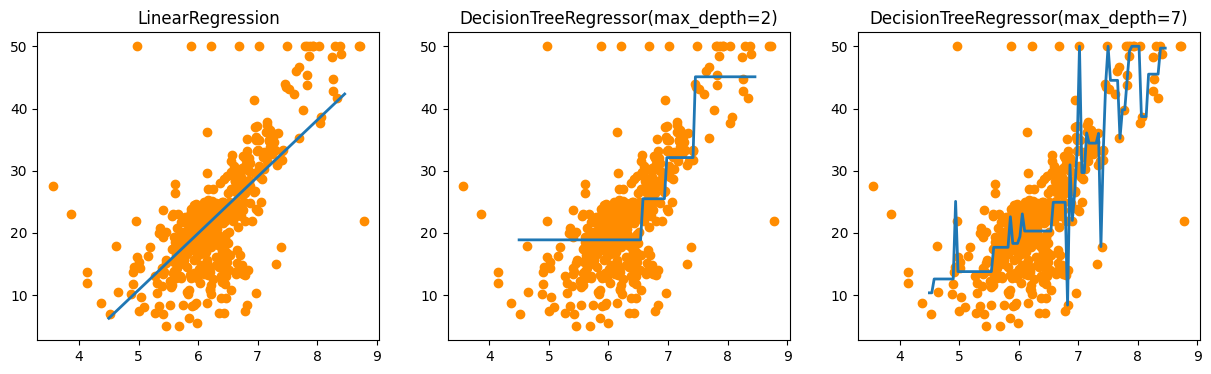

In [54]:
fig,axes = plt.subplots(figsize=(15,4),ncols=3)
ax1,ax2,ax3 = axes

ax1.set_title('LinearRegression')
ax1.scatter(df.RM, df.Target, c='darkorange')
ax1.plot(x_test,pred_lr,label='linear',linewidth=2)

ax2.set_title('DecisionTreeRegressor(max_depth=2)')
ax2.scatter(df.RM, df.Target, c='darkorange')
ax2.plot(x_test,pred_rf2,label='max_depth:2',linewidth=2)

ax3.set_title('DecisionTreeRegressor(max_depth=7)')
ax3.scatter(df.RM, df.Target, c='darkorange')
ax3.plot(x_test,pred_rf7,label='max_depth:7',linewidth=2)

plt.show()